# customer churn predection using ANN(Artificial Neural Networks)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6181,4937-QPZPO,Male,0,Yes,Yes,61,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,99.9,6241.35,No


In [4]:
df.drop('customerID',axis=1,inplace=True)

In [5]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df[ pd.to_numeric(df.TotalCharges,errors='coerce').isnull() ]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df1=df[df.TotalCharges!=' ']

In [9]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df1.TotalCharges=pd.to_numeric(df1['TotalCharges'])

D:\Anaconda\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### Data Visualization

In [11]:
tenure_churn_no=df1[df1['Churn']=='No'].tenure
tenure_churn_yes=df1[df1['Churn']=='Yes'].tenure

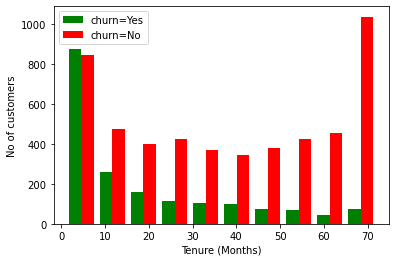

In [12]:
plt.xlabel('Tenure (Months)')
plt.ylabel('No of customers')
plt.hist([tenure_churn_yes,tenure_churn_no],color=['Green','Red'],label=['churn=Yes','churn=No'])
plt.legend()

In [13]:
tenure_churn_no=df1[df1['Churn']=='No'].MonthlyCharges
tenure_churn_yes=df1[df1['Churn']=='Yes'].MonthlyCharges

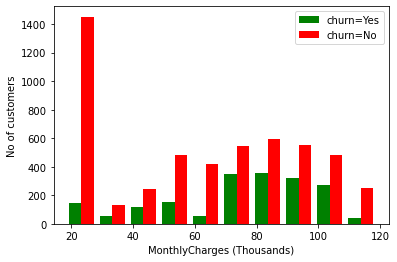

In [14]:
plt.xlabel('MonthlyCharges (Thousands)')
plt.ylabel('No of customers')
plt.hist([tenure_churn_yes,tenure_churn_no],color=['Green','Red'],label=['churn=Yes','churn=No'])
plt.legend()

### Data preprocessing

In [15]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


#### convert yes:1 and No:0

In [16]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [17]:
df1['gender'].replace({'Male':1,'Female':0},inplace=True)

#### one hot encoding 

In [18]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [19]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [20]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

#### Building ANN Model

In [29]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_history=model.fit(X_train, y_train,validation_split=0.33, epochs = 100)

Epoch 1/100
118/118 [==============================] - 0s 4ms/step - loss: 0.6231 - accuracy: 0.6359 - val_loss: 0.5007 - val_accuracy: 0.7501
Epoch 2/100
118/118 [==============================] - 0s 3ms/step - loss: 0.4512 - accuracy: 0.7866 - val_loss: 0.4361 - val_accuracy: 0.7868
Epoch 3/100
118/118 [==============================] - 0s 3ms/step - loss: 0.4219 - accuracy: 0.8049 - val_loss: 0.4290 - val_accuracy: 0.7916
Epoch 4/100
118/118 [==============================] - 0s 2ms/step - loss: 0.4158 - accuracy: 0.8068 - val_loss: 0.4253 - val_accuracy: 0.7975
Epoch 5/100
118/118 [==============================] - 0s 3ms/step - loss: 0.4113 - accuracy: 0.8071 - val_loss: 0.4252 - val_accuracy: 0.8024
Epoch 6/100
118/118 [==============================] - 0s 3ms/step - loss: 0.4092 - accuracy: 0.8097 - val_loss: 0.4223 - val_accuracy: 0.8051
Epoch 7/100
118/118 [==============================] - 0s 3ms/step - loss: 0.4063 - accuracy: 0.8087 - val_loss: 0.4218 - val_accuracy: 0.8029

Epoch 58/100
118/118 [==============================] - 0s 3ms/step - loss: 0.3507 - accuracy: 0.8384 - val_loss: 0.4468 - val_accuracy: 0.7889
Epoch 59/100
118/118 [==============================] - 0s 3ms/step - loss: 0.3496 - accuracy: 0.8394 - val_loss: 0.4485 - val_accuracy: 0.7938
Epoch 60/100
118/118 [==============================] - 0s 3ms/step - loss: 0.3485 - accuracy: 0.8344 - val_loss: 0.4491 - val_accuracy: 0.7900
Epoch 61/100
118/118 [==============================] - 0s 3ms/step - loss: 0.3474 - accuracy: 0.8394 - val_loss: 0.4523 - val_accuracy: 0.7857
Epoch 62/100
118/118 [==============================] - 0s 2ms/step - loss: 0.3460 - accuracy: 0.8384 - val_loss: 0.4513 - val_accuracy: 0.7884
Epoch 63/100
118/118 [==============================] - 0s 2ms/step - loss: 0.3458 - accuracy: 0.8397 - val_loss: 0.4505 - val_accuracy: 0.7894
Epoch 64/100
118/118 [==============================] - 0s 3ms/step - loss: 0.3462 - accuracy: 0.8392 - val_loss: 0.4532 - val_accuracy:

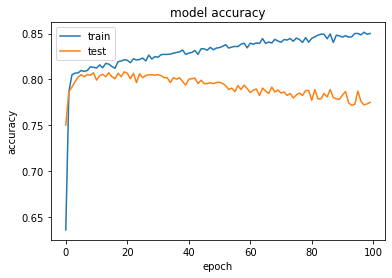

In [30]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

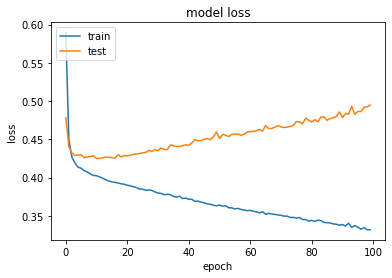

In [27]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()